# Step 1: Importing Necessary Dependencies 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 2: Importing and Reading Dataset

In [4]:
df=pd.read_csv("abcnews-date-text.csv")

In [6]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


# Step 3: Data Preprocessing

In [7]:
#To select only a million rows to use in our dataset
data = df.sample(n=100000, axis=0) 

In [8]:
 #To extract the headline_text column and give it the variable name data
data= data['headline_text'] 

In [10]:
# lemmatization and removing stopwords

# Downloading dependencies:-

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

#Function to lemmatize and remove stopwords from the text data
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words


#applying the function to the dataset
data = data.apply(preprocess)
data

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


731112     [plan, reveals, 23m, rockhampton, council, de,...
1192269    [darwin, auto, electrician, fear, shutdown, co...
1095162    [beijing, move, curb, overseas, property, inve...
973386                 [success, womens, team, mean, payday]
964405     [cadel, evans, great, ocean, road, race, given...
                                 ...                        
157695                [labor, welcome, pm, summit, backflip]
926988                               [learning, rope, rodeo]
1239206            [record, daily, vaccination, necessarily]
397739     [russian, warship, move, secure, arctic, resou...
987391     [unsung, wallaby, hero, fardy, happy, avoid, l...
Name: headline_text, Length: 100000, dtype: object

# Step 4: Training the Model

In [11]:
# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['u', 'australian', 'government', 'market', 'china', 'farmer', 'drug', 'nt', 'rise', 'record']
Topic: 1
Words: ['police', 'man', 'court', 'death', 'woman', 'crash', 'child', 'face', 'charged', 'murder']
Topic: 2
Words: ['new', 'say', 'plan', 'australia', 'council', 'govt', 'call', 'back', 'nsw', 'report']
Topic: 3
Words: ['win', 'interview', 'wa', 'get', 'election', 'claim', 'green', 'labor', 'final', 'opposition']
Topic: 4
Words: ['fire', 'sydney', 'year', 'home', 'hit', 'queensland', 'centre', 'north', 'one', 'house']


In [19]:
print('Number of unique tokens: %d' % len(dictionary))

Number of unique tokens: 10423


# Step 5: Plotting a Word Cloud for the Topics

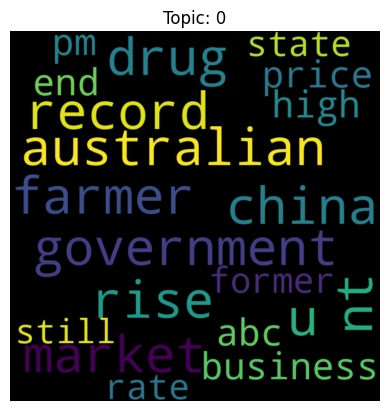

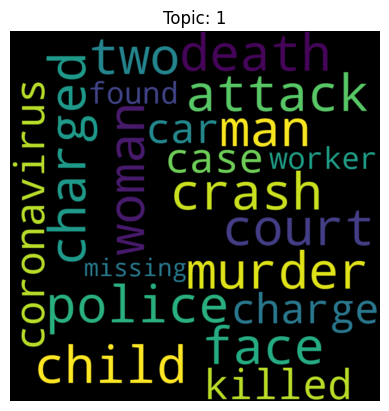

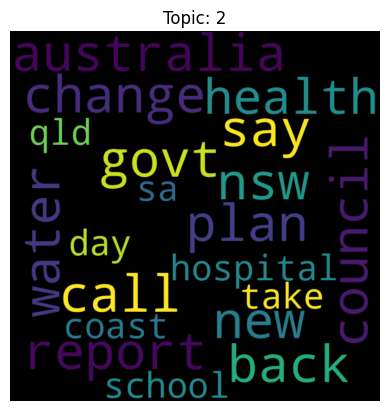

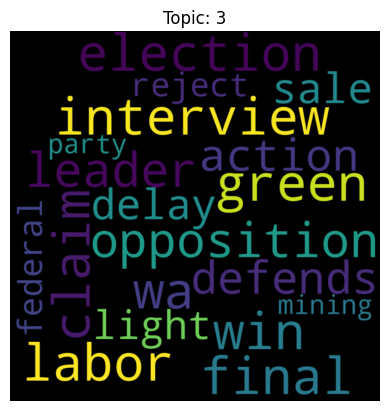

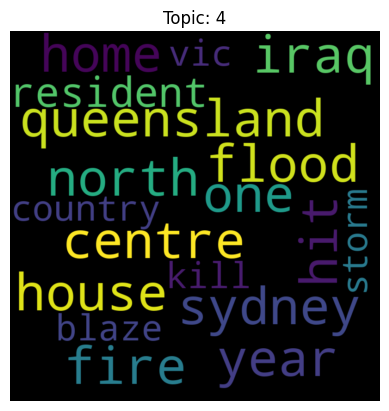

In [13]:
# Plotting a wordcloud of the topics 

for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()